https://colab.research.google.com/drive/13JnlYckYdwHapSmoU4TEj72GWji1t1eR?authuser=1#scrollTo=TZbRqQMBK6dB

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [2]:
file = "diabetes.csv"
df = pd.read_csv(file)

In [3]:
# Renaming columns
df.rename(columns=lambda x: x.title(), inplace=True)
df.head(4)

,Pregnancies,Glucose,Bloodpressure,Skinthickness,Insulin,Bmi,Diabetespedigreefunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0


In [4]:
# There are some missing values.
print(df.isna().sum())

# Not much, so we can remove it.
df.dropna(inplace=True)

Pregnancies                  0
Glucose                      4
Bloodpressure                6
Skinthickness                8
Insulin                      6
Bmi                          4
Diabetespedigreefunction    10
Age                          2
Outcome                      0
dtype: int64


In [5]:
# Description of the entire DataFrame.
df.describe()

,Pregnancies,Glucose,Bloodpressure,Skinthickness,Insulin,Bmi,Diabetespedigreefunction,Age,Outcome
count,1498.000000,1498.000000,1498.000000,1498.00000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,3.843792,120.424566,69.053405,20.59279,79.379172,31.935514,0.473105,33.194927,0.345794
std,3.385837,31.767336,19.338902,15.91262,115.211706,7.891835,0.332763,11.746575,0.475785
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.00000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.00000,29.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.00000,126.000000,36.500000,0.626000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking how many people there are with diabetes.
df["Outcome"].value_counts().to_frame()

,Outcome
0,980
1,518


### Check which feature has the greatest impact on the final result.

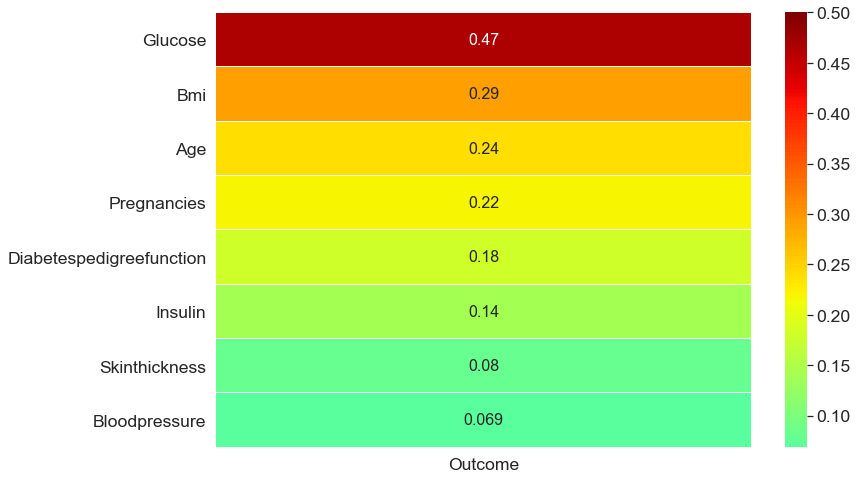

In [7]:
cor = df.corr().iloc[ : , -1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.show()

In [8]:
# Division of a data set into a dependent variable and an independent variable.

# independent variable
X = df.iloc[ : , : -1]

# dependent variable
y = df.Outcome

In [9]:
# The division of values into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [10]:
# Creating an estimator model and training it.
model = LogisticRegression(max_iter=125)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"The model correctly classifies with {score*100:.2f}% accuracy.")

y_pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

The model correctly classifies with 82.00% accuracy.


,0,1
0,174,17
1,37,72


In [11]:
print(f"The model predicts disease with the following accuracy:\n\n\
Healthy people - classified as\n\t\
No disease = {cm[0][0]}/{cm.loc[0].sum()}\n\tDisease = {cm[1][0]}/{cm.loc[0].sum()}\n\n\
\
Sick people - diabetic - classified as\n\t\
No disease = {cm[0][1]}/{cm.loc[1].sum()}\n\tDisease = {cm[1][1]}/{cm.loc[1].sum()}")

The model predicts disease with the following accuracy:

Healthy people - classified as
	No disease = 174/191
	Disease = 17/191

Sick people - diabetic - classified as
	No disease = 37/109
	Disease = 72/109


### Check the predictions as you may have diabetes or not.

In [12]:
# Pregnancies: Number of times pregnant
PREGNANCIES = None

# Plasma glucose concentration over 2 hours in an oral glucose tolerance test 
GLUCOSE = None

# Diastolic blood pressure (mm Hg)
BLOODPRESSURE = None

# Triceps skin fold thickness (mm)
SKINTHICKNESS = None

# 2-Hour serum insulin (mu U/ml)
INSULIN = None

# Body mass index (weight in kg/(height in m)2)
BMI = None

# DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
DIABETESPEDIGREEFUNCTION = None

# Age (years)
AGE = None

In [13]:
sample = {
    'Pregnancies': PREGNANCIES, 
    'Glucose': GLUCOSE, 
    'Bloodpressure': BLOODPRESSURE, 
    'Skinthickness': SKINTHICKNESS, 
    'Insulin': INSULIN,
    'Bmi': BMI, 
    'Diabetespedigreefunction': DIABETESPEDIGREEFUNCTION, 
    'Age':AGE,
}

In [14]:
if None in sample.values():
    print("Please do not leave any variable with the 'None' value.")
else:
    trial = pd.DataFrame.from_dict(data=sample, orient='index').T
    print(f"Outcome: {model.predict(trial)[0]} - (0 if non-diabetic, 1 if diabetic)")
    print(f"The probability of no disease {model.predict_proba(trial)[0][0]*100:.2f}%\nThe probability of disease {model.predict_proba(trial)[0][1]*100:.2f}%")

Please do not leave any variable with the value 'None'.
